# **Ecommerce Churn Rate Analysis**

Dataset source: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


Goal: Analyse the data to classify the characteristics of user that will churn; or will retain.

# **Initializing**


In [2]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [3]:
def xtickposition(position):
    if position == 'top':
        plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
        plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    if position == 'bottom':
        plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
        plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True

In [4]:
def plotborder(plotname, bordercolor, tickcolor):
    ## Borders
    plotname.spines['top'].set_visible(False)
    plotname.spines['right'].set_visible(False)
    plotname.spines['bottom'].set_color(str(bordercolor))
    plotname.spines['left'].set_color(str(bordercolor))

    ## X-ticks Y-ticks
    plotname.tick_params(colors = str(tickcolor))
    
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)

In [5]:
def plotlabel(plotname, xlabel, ylabel, labelcolor):
    ## X-label
    plotname.set_xlabel(str(xlabel), fontsize = 12, color = str(labelcolor), labelpad = 10, fontweight = 'bold')

    ## Y-label
    plotname.set_ylabel(str(ylabel), fontsize = 12, color = str(labelcolor), labelpad = 10, fontweight = 'bold')

In [6]:
def barlabel(dataframe, labelcolumn, plotname, color):

    label1 = []
    label2 = []

    for i in dataframe.index:
        if i % 2 == 0:
            label1.append(dataframe[str(labelcolumn)][i])
        else:
            label2.append(dataframe[str(labelcolumn)][i])
    
    plotname.bar_label(plotname.containers[0], labels = label1, fontsize = 14, fontweight = 'bold', color = color, padding = +5)
    plotname.bar_label(plotname.containers[1], labels = label2, fontsize = 14, fontweight = 'bold', color = color, padding = +5)

In [7]:
# Chi-Squared Method
def cramers_v(x, y):
    '''
    Cramers V correlation statistic for categorial-categorial association
    based on chi-squared
    ##
    x = column 1
    y = column 2
    '''
    
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [8]:
def groupbydf(df, feature):
    ## Adding sum user count column
    df['Sum'] = df.groupby(str(feature))['Count'].transform('sum')

    ## Adding percentage of each Segment
    df['Percentage'] = round(df['Count'] / df['Sum'] * 100, ndigits = 0)

    ## Changing percentag to int and add % for labeling
    df['Percentage'] = df['Percentage'].astype(int).astype(str)+'%'

In [9]:
def mergebysegment(df, feature1, feature2):
    left = df[df['Segment'] == 0].groupby([str(feature1)])[str(feature2)].mean().reset_index()
    right = df[df['Segment'] == 1].groupby([str(feature1)])[str(feature2)].mean().reset_index()
    if len(left) > len(right):
        return(pd.merge(left, right, how = 'inner', on = str(feature1), suffixes=('_churn', '_retained')))
    else:
        return(pd.merge(left, right, how = 'outer', on = str(feature1), suffixes=('_churn', '_retained')))
    

In [10]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 1)

In [11]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **Computing Churn Rate**

In [13]:
userchurncount = df['Churn'].value_counts()
userchurncountpercent = df['Churn'].value_counts(normalize = True)

churnrate = "{:.2%}".format(userchurncountpercent[1])
retentionrate = "{:.2%}".format(userchurncountpercent[0])

print('Total User:', userchurncount[0] + userchurncount[1])
print('Churn User:', userchurncount[1])
print('Retained User:', userchurncount[0])
print('\nChurn Rate:', churnrate)
print('Retention Rate:', retentionrate)

Total User: 5630
Churn User: 948
Retained User: 4682

Churn Rate: 16.84%
Retention Rate: 83.16%


In [14]:
df['OrderCount'].value_counts()

2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: OrderCount, dtype: int64

# **Analysing User Churn-Tenure Relation**

Since user churn is basically user retention (they are directly inversely proportional); a problem with user churn is the same as a problem with user retention. 

Retention itself is about ‘time frame of a user staying/keep returning’; the tenure of users. 

Having this in mind, analysing churn and tenure together will give us insight of how our user behave in the retention funnel. 


In [15]:
palette = ["lightslategrey", "cadetblue"]
sns.set_palette(sns.color_palette(palette))

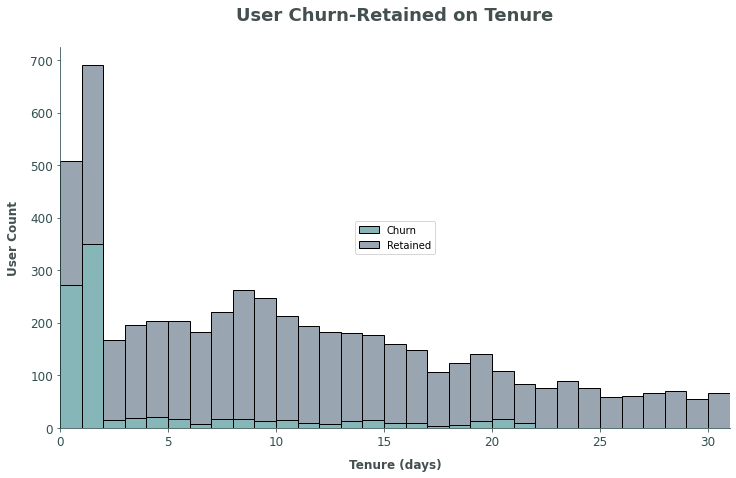

In [16]:
## draft plot
xtickposition('bottom')
tenure = plt.figure(figsize = (12, 7), facecolor = 'white')
tenure = sns.histplot(data = df, x = 'Tenure', hue = 'Churn', multiple= 'stack', binwidth = 1)
tenure.set_xlim(0, 31)

## Title
tenure.set_title('User Churn-Retained on Tenure\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend
tenure.legend(['Churn', 'Retained'], loc = 'center')

plotlabel(tenure, 'Tenure (days)', 'User Count', '#444f4f')

plotborder(tenure, 'darkslategray', 'darkslategrey')

Alternatively, the data can also be plotted to represent user retention; if total user in the timeframe is assumed as the initial user count.

In [17]:
## Creating new dataframe that is lineplot friendly
df_retention = df.groupby('Tenure').agg({'Churn' : 'sum'}).reset_index()  

## Adding initial user count as top most row
df_retention.loc[-1] = [-0.01, 0]
df_retention.sort_index(inplace = True) 
df_retention.reset_index(inplace = True, drop = True)

## Adding cummulative churn column
df_retention['cum_churn'] = df_retention.loc[:, 'Churn'].cumsum()

## Adding retained user column
df_retention['total_users'] = df.loc[:, 'Tenure'].count() - df_retention['cum_churn']

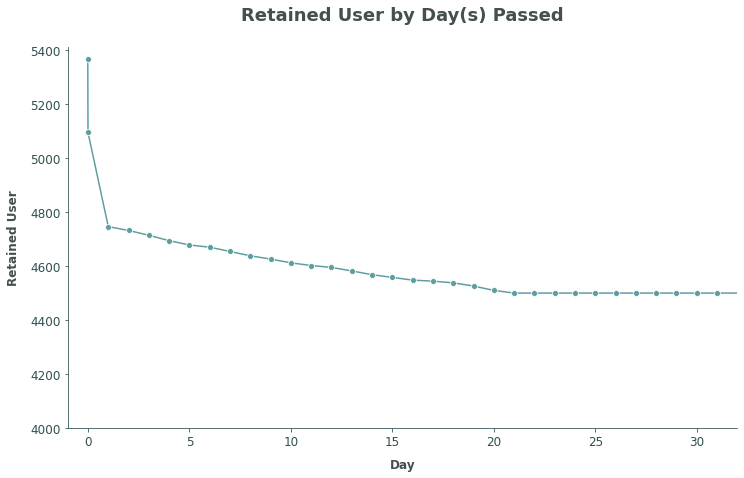

In [18]:
## draft plot
xtickposition('bottom')
retention = plt.figure(figsize = (12, 7), facecolor = 'white')
retention = sns.lineplot(data = df_retention, x = 'Tenure', y = 'total_users', color = 'cadetblue', ci=None, marker='o')

## X-Axis Y-Axis
retention.set_xlim(-1, 32)
retention.set_ylim(4000)

## Title
retention.set_title('Retained User by Day(s) Passed\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

plotlabel(retention, 'Day', 'Retained User', '#444f4f')

plotborder(retention, 'darkslategrey', 'darkslategrey')

# **Finding User Characteristics**

Making new dataframe with a new column added as Segment to separate Churn Users and Retain Users.

The Segment is based on the finidngs from Churn-Tenure Analysis:
2 Segments: (1) Churn Users – users that are churn and on their 0-2 day; (2) Retained Users – users that stays for longer.
Going forward ‘Segment’ will refer to this segmentation and used as a base to analyse user characteristics.

Checking the two Segment's descriptive statistics.

In [19]:
df2 = df.copy()

conditions = [
    (df2['Churn'] == 1) & (df2['Tenure'] <= 2), #Segment 1: Churn Users
    (df2['Churn'] == 0) & (df2['Tenure'] > 2) #Segment 2: Retain Users
    ]

values = [0, 1] ## 0: Churn; 1: Retain

## Filtering out any users that are not including the Segments
df2['Segment'] = np.select(conditions, values, 3)
df2 = (df2[~(df2['Segment'] == 3)])

## Dropping unnecessary column
df2 = df2.drop('Churn', axis = 1)
df2 = df2.drop('Tenure', axis = 1)
df2 = df2.drop('DaySinceLastOrder', axis = 1)

## Filling NA value for certain columns
df2['CouponUsed'].fillna(0, inplace = True)
df2['HourSpendOnApp'].fillna(0, inplace = True)

## moving columns
cols = list(df2.columns)
df2 = df2[cols[::-1]]

## Defining 2 different dataframe
df2_churn = df2[df2['Segment'] == 0]
df2_retain = df2[df2['Segment'] == 1]

In [20]:
df2.describe()

,Segment,CashbackAmount,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,Complain,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,HourSpendOnApp,WarehouseToHome,CityTier,CustomerID
count,4404.000000,4404.000000,4165.000000,4404.000000,4155.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4225.000000,4404.000000,4404.000000
mean,0.855813,183.996344,3.235294,1.770436,15.738387,0.286104,4.409173,3.057902,3.725477,2.834242,15.675740,1.655767,52904.076521
std,0.351319,50.051863,3.082885,1.958977,3.680572,0.451990,2.587495,1.387809,1.016456,0.921270,8.585546,0.914980,1619.385803
min,0.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.000000,50004.000000
25%,1.000000,148.940000,1.000000,1.000000,13.000000,0.000000,2.000000,2.000000,3.000000,2.000000,9.000000,1.000000,51511.750000
50%,1.000000,168.730000,2.000000,1.000000,15.000000,0.000000,4.000000,3.000000,4.000000,3.000000,14.000000,1.000000,52975.000000
75%,1.000000,205.120000,4.000000,2.000000,18.000000,1.000000,6.000000,4.000000,4.000000,3.000000,20.000000,3.000000,54305.250000
max,1.000000,324.990000,16.000000,16.000000,26.000000,1.000000,22.000000,5.000000,6.000000,5.000000,127.000000,3.000000,55630.000000


In [21]:
df2_churn.describe()

,Segment,CashbackAmount,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,Complain,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,HourSpendOnApp,WarehouseToHome,CityTier,CustomerID
count,635.0,635.000000,633.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,569.000000,635.000000,635.000000
mean,0.0,154.931323,2.646130,1.648819,15.831496,0.524409,4.203150,3.418898,4.017323,2.779528,17.302285,1.787402,52881.943307
std,0.0,26.427238,2.404746,1.708527,3.891058,0.499798,2.635236,1.368052,1.017830,1.024259,8.505177,0.948433,1627.266719
min,0.0,110.090000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.000000,50004.000000
25%,0.0,137.065000,1.000000,1.000000,13.000000,0.000000,2.000000,3.000000,3.000000,2.000000,10.000000,1.000000,51553.500000
50%,0.0,148.980000,2.000000,1.000000,15.000000,1.000000,3.000000,3.000000,4.000000,3.000000,16.000000,1.000000,52950.000000
75%,0.0,166.845000,2.000000,2.000000,18.000000,1.000000,6.000000,5.000000,5.000000,3.000000,23.000000,3.000000,54290.500000
max,0.0,261.100000,16.000000,16.000000,26.000000,1.000000,20.000000,5.000000,6.000000,4.000000,36.000000,3.000000,55603.000000


In [22]:
df2_retain.describe()

,Segment,CashbackAmount,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,Complain,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,HourSpendOnApp,WarehouseToHome,CityTier,CustomerID
count,3769.0,3769.000000,3532.000000,3769.000000,3520.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3656.000000,3769.000000,3769.000000
mean,1.0,188.893210,3.340883,1.790926,15.721591,0.245954,4.443884,2.997081,3.676307,2.843460,15.422593,1.633590,52907.805519
std,0.0,51.415091,3.177982,1.997560,3.641632,0.430708,2.578100,1.382036,1.008074,0.902586,8.571420,0.907475,1618.241239
min,1.0,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.000000,50027.000000
25%,1.0,151.620000,1.000000,1.000000,13.000000,0.000000,2.000000,2.000000,3.000000,2.000000,9.000000,1.000000,51502.000000
50%,1.0,173.410000,2.000000,1.000000,15.000000,0.000000,4.000000,3.000000,4.000000,3.000000,13.000000,1.000000,52978.000000
75%,1.0,213.370000,4.000000,2.000000,18.000000,0.000000,6.000000,4.000000,4.000000,3.000000,19.000000,3.000000,54307.000000
max,1.0,324.990000,16.000000,16.000000,26.000000,1.000000,22.000000,5.000000,6.000000,5.000000,127.000000,3.000000,55630.000000


## **Correlation**

To help with determining which feature to analyse, using correlation heatmap could help in checking each feature's correlation with target.

Since the data's features are a mix of numerical and categorical value, there is a need to separate both types to their own dataframe and calculate their correlation separately.

Using Pearson's Correlation for numerical data; Chi-Squared method for categorical data.

In [23]:
## numerical
numerical_type = ['float64', 'int64', 'int32']
numerical_columns = df2.select_dtypes(include = numerical_type).columns
numerical_columns = numerical_columns.drop('CustomerID')

## categorical
object_type = ['object']
object_columns = df2.select_dtypes(include = object_type).columns
object_columns = object_columns.insert(0, 'Segment')
object_columns = object_columns.insert(-1, 'CityTier')
object_columns = object_columns.insert(-1, 'Complain')
object_columns = object_columns.insert(-1, 'SatisfactionScore')

Text(0.5, 1.0, 'Correlation: Numerical (Pearson)\n')

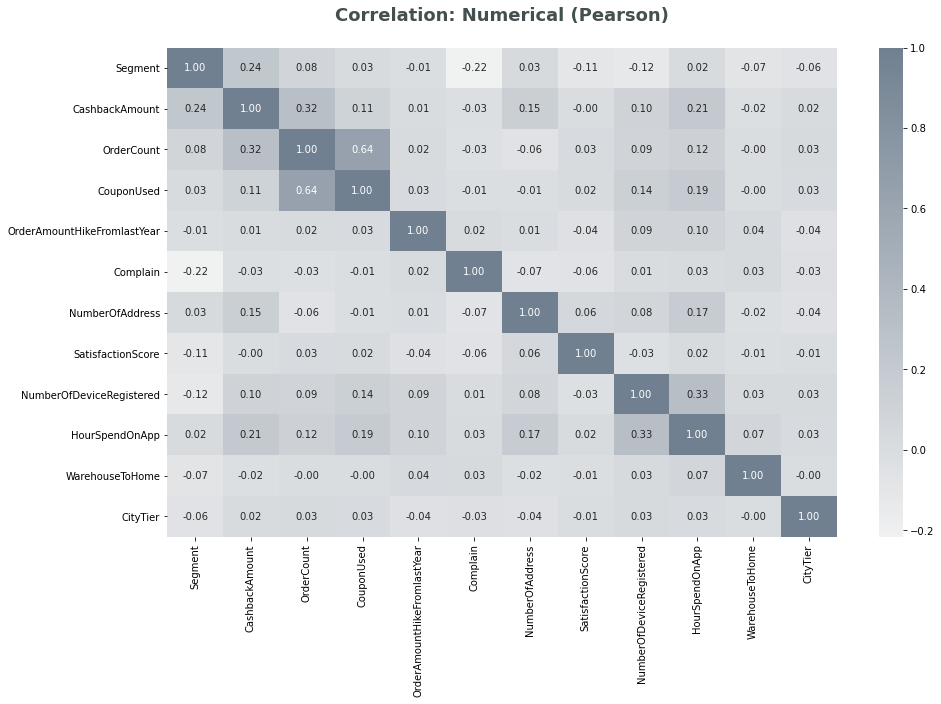

In [24]:
## numerical data correlation
df_numerical = df2.loc[:, numerical_columns]

numcorrplot = plt.figure(figsize = (15, 9), facecolor = 'white')
xtickposition('bottom')
numcorrplot = sns.heatmap(df_numerical.corr(), annot = True, fmt = '.2f', cmap = sns.light_palette('slategrey', as_cmap=True))
numcorrplot.set_title('Correlation: Numerical (Pearson)\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

Text(0.5, 1.0, 'Numerical Correlation (Pearson)\n')

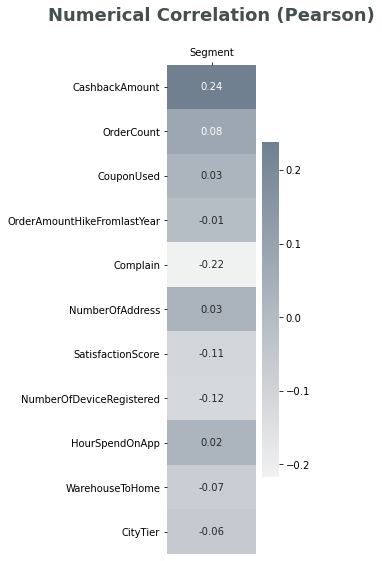

In [25]:
numcorrplot = plt.figure(figsize = (2, 9), facecolor = 'white')
xtickposition('top')
numcorrplot = sns.heatmap(df_numerical.corr()[['Segment']].iloc[1:,], annot = True, fmt = '.2f', cmap = sns.light_palette('slategrey', as_cmap=True))
numcorrplot.set_title('Numerical Correlation (Pearson)\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

In [26]:
## categorical data correlation
df_categorical = df2.loc[:, object_columns]

## Iteration for multiple columns; making i x j shape matrix
a = []
b = []
c = 0
for i in df_categorical.columns:
    b = []
    for j in df_categorical.columns:
        c = cramers_v(df_categorical[i], df_categorical[j]) ## saving correlation value
        b.append(c) ## saving correlation value in a list
    a.append(b) ## saving correlation list to a row

## Making datafame from matrix
categorical_corr = pd.DataFrame(a)
categorical_corr.columns = df_categorical.columns
categorical_corr.index = df_categorical.columns


Text(0.5, 1.0, 'Categorical Correlation (Chi-Squared)\n')

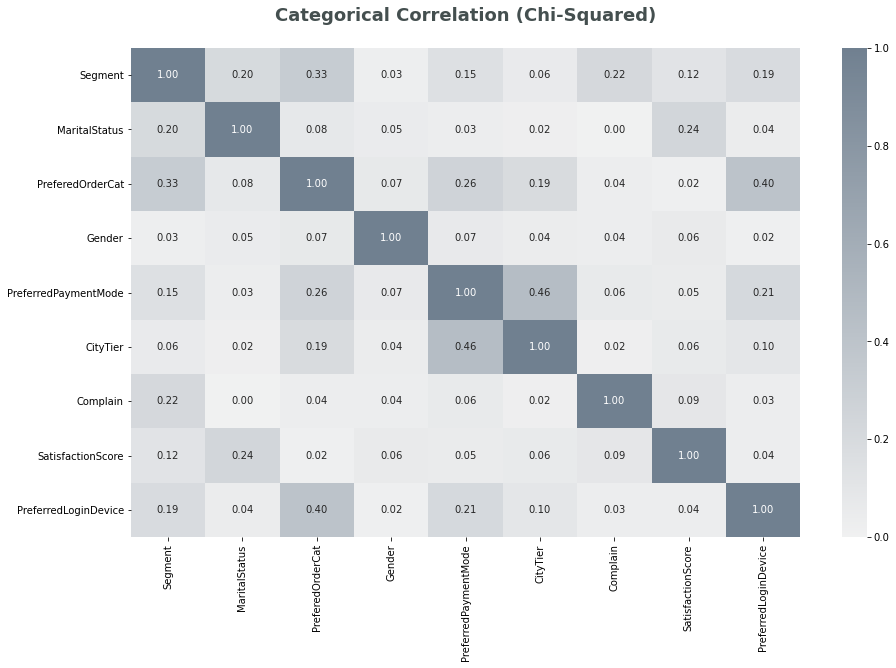

In [27]:
catcorrplot = plt.figure(figsize = (15, 9), facecolor = 'white')
xtickposition('bottom')
catcorrplot = sns.heatmap(categorical_corr, annot = True, fmt = '.2f', cmap = sns.light_palette('slategrey', as_cmap=True))
catcorrplot.set_title('Categorical Correlation (Chi-Squared)\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

Text(0.5, 1.0, 'Categorical Correlation (Chi-Squared)\n')

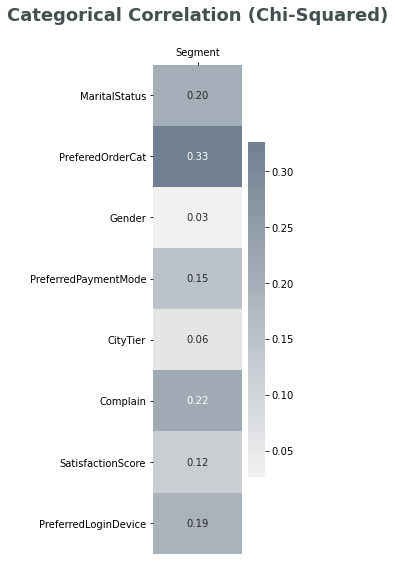

In [28]:
catcorrplot = plt.figure(figsize = (2, 9), facecolor = 'white')
xtickposition('top')
catcorrplot = sns.heatmap(categorical_corr[['Segment']].iloc[1:,], annot = True, fmt = '.2f', cmap = sns.light_palette('slategrey', as_cmap=True))
catcorrplot.set_title('Categorical Correlation (Chi-Squared)\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')


From the correlation calculation there are few notable features, solely based on correlation score:

1. Preferred Order Category (0.33)
2. Cashback Amount (0.24)
3. Complain (0.22)
4. Marital Status (0.20)
5. Preferred Login Device (0.19)

However, choosing features solely based on correlation is not advisable. For example feature like `Maritas Status` is something that's innate to customer and there is no action that could be taken. On the contrary, features like `Satisfaction Score` or `Hours Spend on App` are interesting features/characteristics of users that are related to how the user perceive the platform.

### **Preferred Order Category**

In [29]:
df2['PreferedOrderCat'] = df2['PreferedOrderCat'].apply(lambda x : 'Mobile Phone' if x == 'Mobile' else x)
prefcat_df = df2.groupby(['PreferedOrderCat', 'Segment'])['CustomerID'].count().reset_index()
prefcat_df.rename(columns = {'CustomerID' : 'Count'}, inplace = True)

groupbydf(prefcat_df, 'PreferedOrderCat')

## Adding null rows
prefcat_df.loc[9.5]= ['Others', 0, 0, 69, '0%']
prefcat_df = prefcat_df.sort_index().reset_index(drop = True)

prefcat_df = prefcat_df.reindex([9, 8, 2,3, 4, 5, 0, 1, 6, 7]).reset_index(drop = True)

prefcat_df

,PreferedOrderCat,Segment,Count,Sum,Percentage
0,Others,0,0,69,0%
1,Others,1,242,242,100%
2,Grocery,0,2,388,1%
3,Grocery,1,386,388,99%
4,Laptop & Accessory,0,154,1721,9%
5,Laptop & Accessory,1,1567,1721,91%
6,Fashion,0,64,734,9%
7,Fashion,1,670,734,91%
8,Mobile Phone,0,415,1319,31%
9,Mobile Phone,1,904,1319,69%


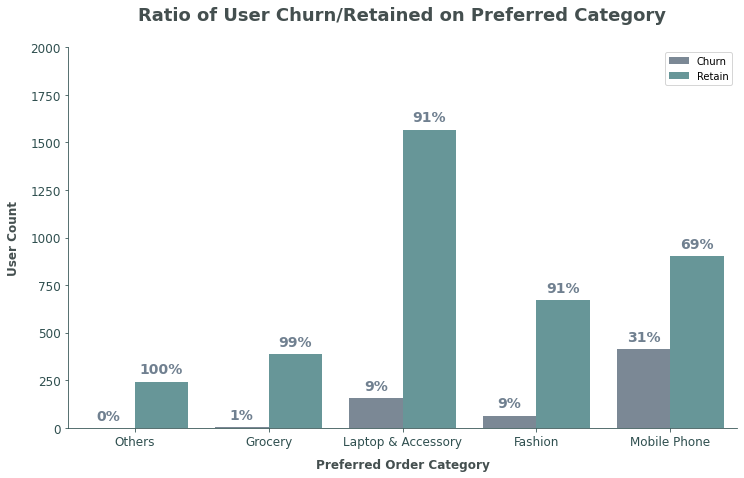

In [30]:
## Draft Plot
prefcatplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
prefcatplot = sns.barplot(data = prefcat_df, x = 'PreferedOrderCat', y = 'Count', hue = 'Segment')
prefcatplot.set_ylim(0,2000)

plotlabel(prefcatplot, 'Preferred Order Category', 'User Count', '#444f4f')

plotborder(prefcatplot, 'darkslategrey', 'darkslategrey')

barlabel(prefcat_df, 'Percentage', prefcatplot, 'slategrey')

prefcatplot.set_title("Ratio of User Churn/Retained on Preferred Category\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend
h, l = prefcatplot.get_legend_handles_labels()
l = ['Churn', 'Retain']
prefcatplot.legend(h, l)

### **Cashback**

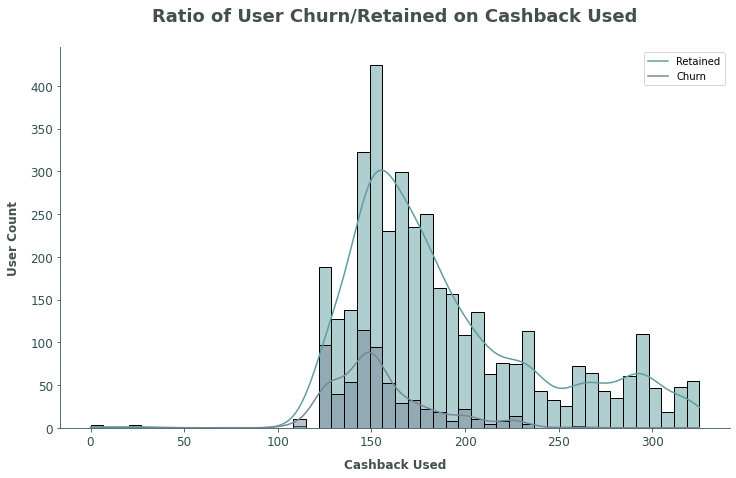

In [31]:
cashbackdplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
cashbackdplot = sns.histplot(data = df2, x = 'CashbackAmount', hue = 'Segment', kde = True)

cashbackdplot.set_title("Ratio of User Churn/Retained on Cashback Used\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

plotlabel(cashbackdplot, 'Cashback Used', 'User Count', '#444f4f')

plotborder(cashbackdplot, 'darkslategrey', 'darkslategrey')

## legend
cashbackdplot.legend(['Retained', 'Churn'])

[Text(0, 0, 'Churn'), Text(1, 0, 'Retained')]

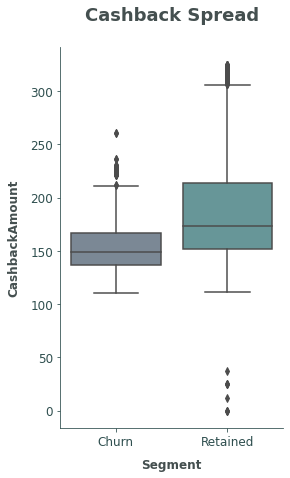

In [32]:
a = df2[df2['Segment'] == 0]['CashbackAmount']
b = df2[df2['Segment'] == 1]['CashbackAmount']
data = [a, b]

cashbackbplot = plt.figure(figsize = (4, 7), facecolor = 'white')
cashbackbplot = sns.boxplot(data = data)

plotlabel(cashbackbplot, 'Segment', 'CashbackAmount', '#444f4f')

plotborder(cashbackbplot, 'darkslategrey', 'darkslategrey')

cashbackbplot.set_title("Cashback Spread\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

cashbackbplot.set_xticklabels(['Churn', 'Retained'])

### **OrderCount**

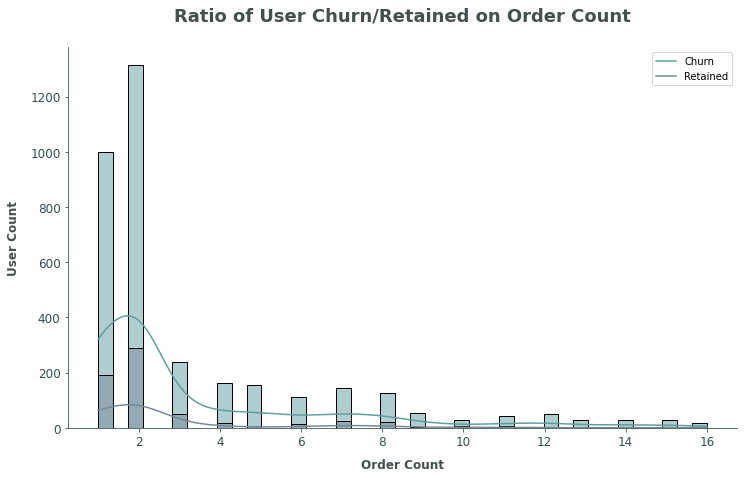

In [33]:
ordercountdplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
ordercountdplot = sns.histplot(data = df2, x = 'OrderCount', hue = 'Segment', kde = True)

ordercountdplot.set_title("Ratio of User Churn/Retained on Order Count\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

plotlabel(ordercountdplot, 'Order Count', 'User Count', '#444f4f')

plotborder(ordercountdplot, 'darkslategrey', 'darkslategrey')


## legend
ordercountdplot.legend(['Churn', 'Retained'])

[Text(0, 0, 'Churn'), Text(1, 0, 'Retained')]

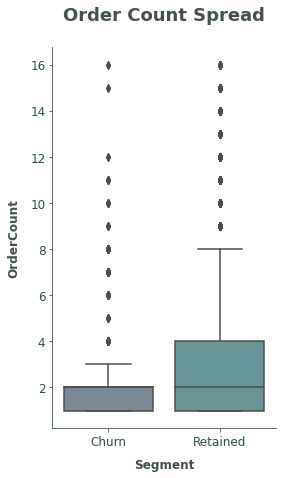

In [34]:
a = df2[df2['Segment'] == 0]['OrderCount']
b = df2[df2['Segment'] == 1]['OrderCount']
data = [a, b]

ordercountbplot = plt.figure(figsize = (4, 7), facecolor = 'white')
ordercountbplot = sns.boxplot(data = data)

plotlabel(ordercountbplot, 'Segment', 'OrderCount', '#444f4f')

plotborder(ordercountbplot, 'darkslategrey', 'darkslategrey')

ordercountbplot.set_title("Order Count Spread\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

ordercountbplot.set_xticklabels(['Churn', 'Retained'])

### **Hour Spend on App**

In [35]:
hourspend_df = df2.groupby(['HourSpendOnApp', 'Segment'])['CustomerID'].count().reset_index()
hourspend_df.rename(columns = {'CustomerID' : 'Count'}, inplace = True)

groupbydf(hourspend_df, 'HourSpendOnApp')

## Adding null rows
hourspend_df.loc[1.5]= [1, 0, 0, 31, '0%']
hourspend_df.loc[8.5]= [5, 0, 0, 2, '0%']
hourspend_df['HourSpendOnApp'] = hourspend_df['HourSpendOnApp'].astype(int)
hourspend_df = hourspend_df.sort_index().reset_index(drop=True)

hourspend_df

,HourSpendOnApp,Segment,Count,Sum,Percentage
0,0,0,46,182,25%
1,0,1,136,182,75%
2,1,0,0,31,0%
3,1,1,31,31,100%
4,2,0,142,1107,13%
5,2,1,965,1107,87%
6,3,0,307,2101,15%
7,3,1,1794,2101,85%
8,4,0,140,981,14%
9,4,1,841,981,86%


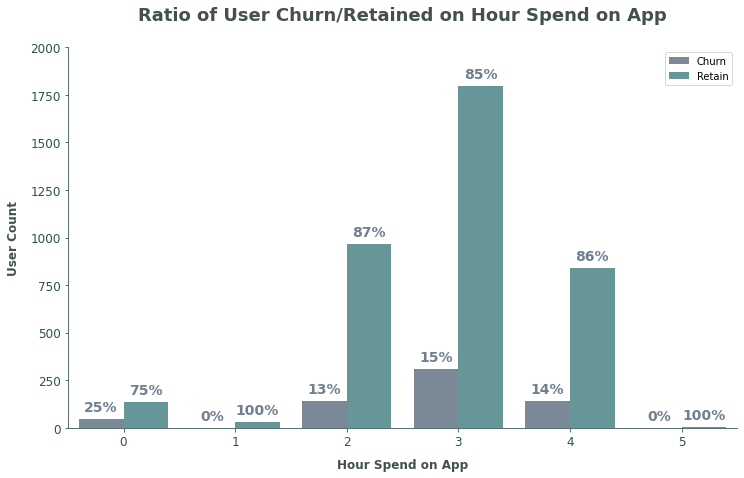

In [36]:
## Draft Plot
hourspendplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
hourspendplot = sns.barplot(data = hourspend_df, x = 'HourSpendOnApp', y = 'Count', hue = 'Segment')
hourspendplot.set_ylim(0,2000)

plotlabel(hourspendplot, 'Hour Spend on App', 'User Count', '#444f4f')

plotborder(hourspendplot, 'darkslategrey', 'darkslategrey')

barlabel(hourspend_df, 'Percentage', hourspendplot, 'slategrey')

hourspendplot.set_title("Ratio of User Churn/Retained on Hour Spend on App\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend
h, l = hourspendplot.get_legend_handles_labels()
l = ['Churn', 'Retain']
hourspendplot.legend(h, l)

### **Complain**

In [41]:
complain_df = df2.groupby(['Complain', 'Segment'])['CustomerID'].count().reset_index()
complain_df.rename(columns = {'CustomerID' : 'Count'}, inplace = True)

groupbydf(complain_df, 'Complain')

## Adding null rows
# complain_df.loc[9.5]= ['Others', 0, 0, 69, '0%']
complain_df = complain_df.sort_index().reset_index(drop=True)

complain_df

,Complain,Segment,Count,Sum,Percentage
0,0,0,302,3144,10%
1,0,1,2842,3144,90%
2,1,0,333,1260,26%
3,1,1,927,1260,74%


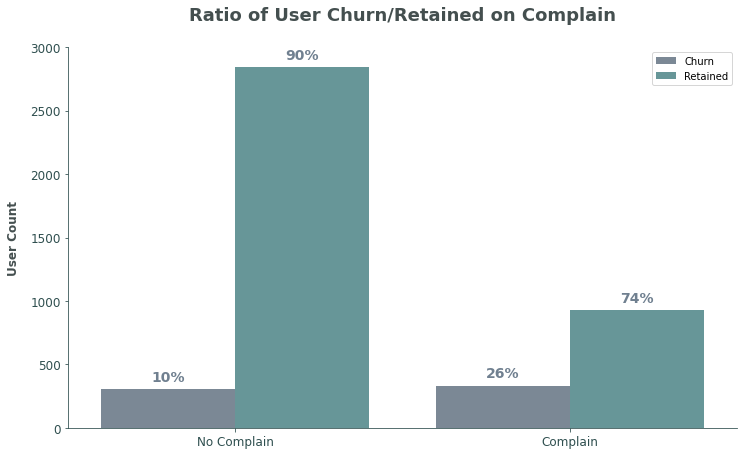

In [46]:
## Draft Plot
complainplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
complainplot = sns.barplot(data = complain_df, x = 'Complain', y = 'Count', hue = 'Segment')
complainplot.set_ylim(0, 3000)

plotlabel(complainplot, '', 'User Count', '#444f4f')

plotborder(complainplot, 'darkslategrey', 'darkslategrey')

barlabel(complain_df, 'Percentage', complainplot, 'slategrey')

complainplot.set_xticklabels(['No Complain', 'Complain'])

complainplot.set_title("Ratio of User Churn/Retained on Complain\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend  
h, l = complainplot.get_legend_handles_labels()
l = ['Churn', 'Retained']
complainplot.legend(h, l)

In [47]:
segcomplain_df = df2.groupby(['Segment', 'Complain'])['CustomerID'].count().reset_index()
segcomplain_df.rename(columns = {'CustomerID' : 'Count'}, inplace = True)

groupbydf(segcomplain_df, 'Segment')

## Adding null rows
# segcomplain_df.loc[9.5]= ['Others', 0, 0, 69, '0%']
segcomplain_df = segcomplain_df.sort_index().reset_index(drop=True)

segcomplain_df

,Segment,Complain,Count,Sum,Percentage
0,0,0,302,635,48%
1,0,1,333,635,52%
2,1,0,2842,3769,75%
3,1,1,927,3769,25%


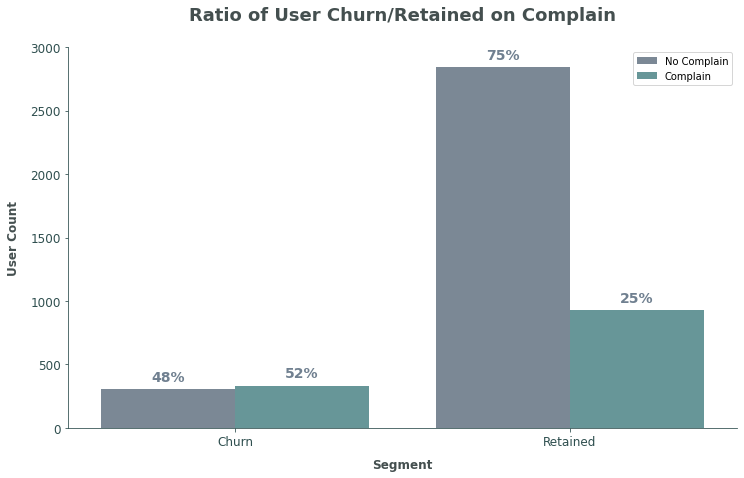

In [53]:
## Draft Plot
segcomplainplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
segcomplainplot = sns.barplot(data = complain_df, x = 'Segment', y = 'Count', hue = 'Complain')
segcomplainplot.set_ylim(0, 3000)

plotlabel(segcomplainplot, 'Segment', 'User Count', '#444f4f')

plotborder(segcomplainplot, 'darkslategrey', 'darkslategrey')

barlabel(segcomplain_df, 'Percentage', segcomplainplot, 'slategrey')

segcomplainplot.set_xticklabels(['Churn', 'Retained'])

segcomplainplot.set_title("Ratio of User Churn/Retained on Complain\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend  
h, l = segcomplainplot.get_legend_handles_labels()
l = ['No Complain', 'Complain']
segcomplainplot.legend(h, l)

### **Satisfaction Score**

In [39]:
satisfaction_df = df2.groupby(['SatisfactionScore', 'Segment'])['CustomerID'].count().reset_index()
satisfaction_df.rename(columns = {'CustomerID' : 'Count'}, inplace = True)

groupbydf(satisfaction_df, 'SatisfactionScore')

## Adding null rows
# satisfaction_df.loc[1.5]= [1, 0, 0, 31, '0%']
# satisfaction_df.loc[8.5]= [5, 0, 0, 2, '0%']
satisfaction_df = satisfaction_df.sort_index().reset_index(drop=True)

satisfaction_df

,SatisfactionScore,Segment,Count,Sum,Percentage
0,1,0,91,932,10%
1,1,1,841,932,90%
2,2,0,49,453,11%
3,2,1,404,453,89%
4,3,0,192,1318,15%
5,3,1,1126,1318,85%
6,4,0,109,830,13%
7,4,1,721,830,87%
8,5,0,194,871,22%
9,5,1,677,871,78%


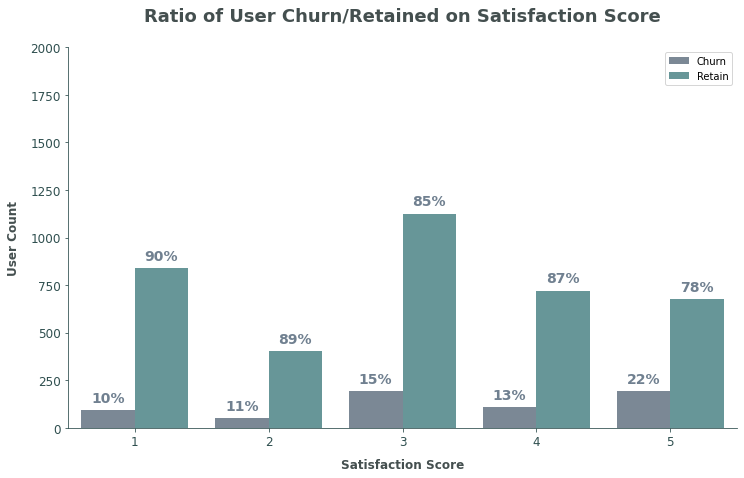

In [40]:
## Draft Plot
satisfactionplot = plt.figure(figsize = (12, 7), facecolor = 'white')
xtickposition('bottom')
satisfactionplot = sns.barplot(data = satisfaction_df, x = 'SatisfactionScore', y = 'Count', hue = 'Segment')
satisfactionplot.set_ylim(0,2000)

plotlabel(satisfactionplot, 'Satisfaction Score', 'User Count', '#444f4f')

plotborder(satisfactionplot, 'darkslategrey', 'darkslategrey')

barlabel(satisfaction_df, 'Percentage', satisfactionplot, 'slategrey')

satisfactionplot.set_title("Ratio of User Churn/Retained on Satisfaction Score\n", fontsize = 18, fontweight = 'bold', color = '#444f4f')

## legend
h, l = satisfactionplot.get_legend_handles_labels()
l = ['Churn', 'Retain']
satisfactionplot.legend(h, l)

## **Cross Referencing Features**

Having analysing and gaining insights from the selected features, it is important to then cross referencing the findings across features. 
This way it is possible to gain more insights and find out relationships between insights.

First to check is 'Preferred Order Category', analysing this feature didn’t give enough information on why users tend to churn more if they prefer to order on certain category.
1. 'Preferred Order Category' vs. 'Cashback Amount'

In [57]:
mergebysegment(df2, 'PreferedOrderCat', 'CashbackAmount')

,PreferedOrderCat,CashbackAmount_churn,CashbackAmount_retained
0,Fashion,206.296875,211.470239
1,Grocery,221.690000,267.320674
2,Laptop & Accessory,169.306364,167.859036
3,Mobile Phone,141.353807,144.207544
4,Others,NaN,304.417107


2. 'Preferred Order Category' vs. 'Order Count'

In [59]:
mergebysegment(df2, 'PreferedOrderCat', 'OrderCount')

,PreferedOrderCat,OrderCount_churn,OrderCount_retained
0,Fashion,4.225806,4.322284
1,Grocery,11.000000,5.543478
2,Laptop & Accessory,2.870130,2.899170
3,Mobile Phone,2.286747,2.379425
4,Others,NaN,5.078512


In [63]:
mergebysegment(df2, 'PreferedOrderCat', 'HourSpendOnApp')

,PreferedOrderCat,HourSpendOnApp_churn,HourSpendOnApp_retained
0,Fashion,2.875000,2.919403
1,Grocery,2.000000,2.829016
2,Laptop & Accessory,2.948052,2.891512
3,Mobile Phone,2.706024,2.706858
4,Others,NaN,2.855372


## **Conclusion – “Aha! Moment”**
From gathering all the insights, it is possible then to determine user characteristic towards the target, churn. However, instead of defining the characteristics of users that have churn tendency; defining users that will retain will be more engaging.
The major insights that have been gathered, the characteristics of users that will retain are:
1.	Complete order on more than 1 category.
2.	Gained >170 cashback from purchases; this also reflects to the total spending amount. (e.g. in this case if cashback is 10% then the total spending would be 1700).
3.	Spends >1 hour on the platform.
4.	Did not file any complain.
These points then could be defined as the platform’s “Aha! Moment”, a set of actions or characteristics that separates users who find value and will stay (retained) on the platform from those who won’t. 
